<a href="https://colab.research.google.com/github/InvestitoreComune/analysis/blob/main/grafico_impatto_spese_fisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

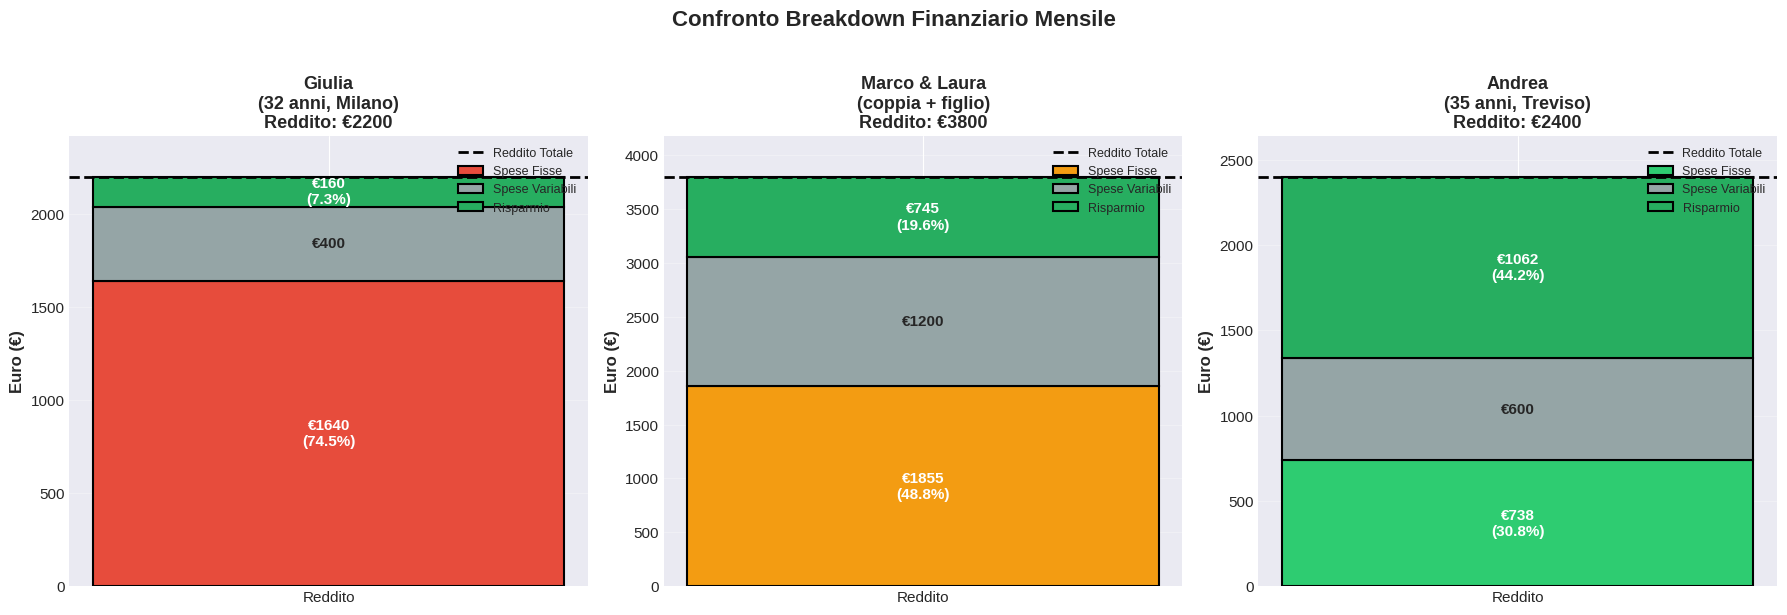

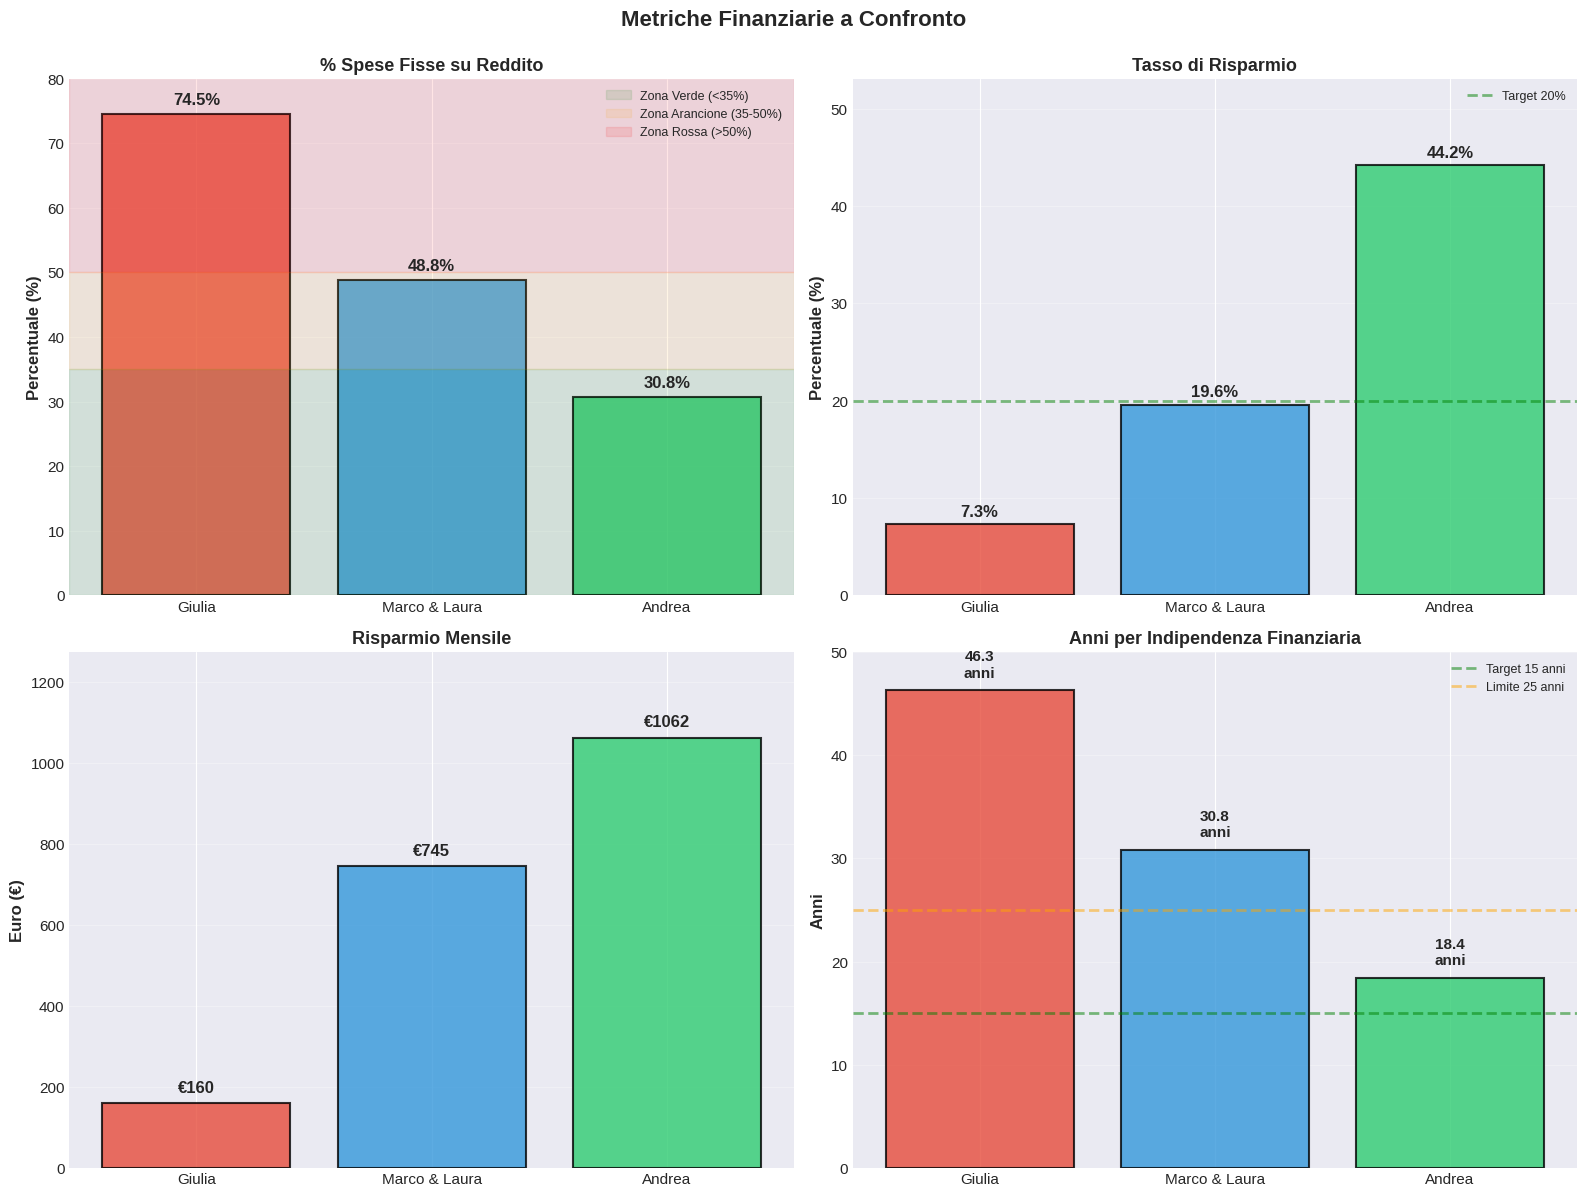

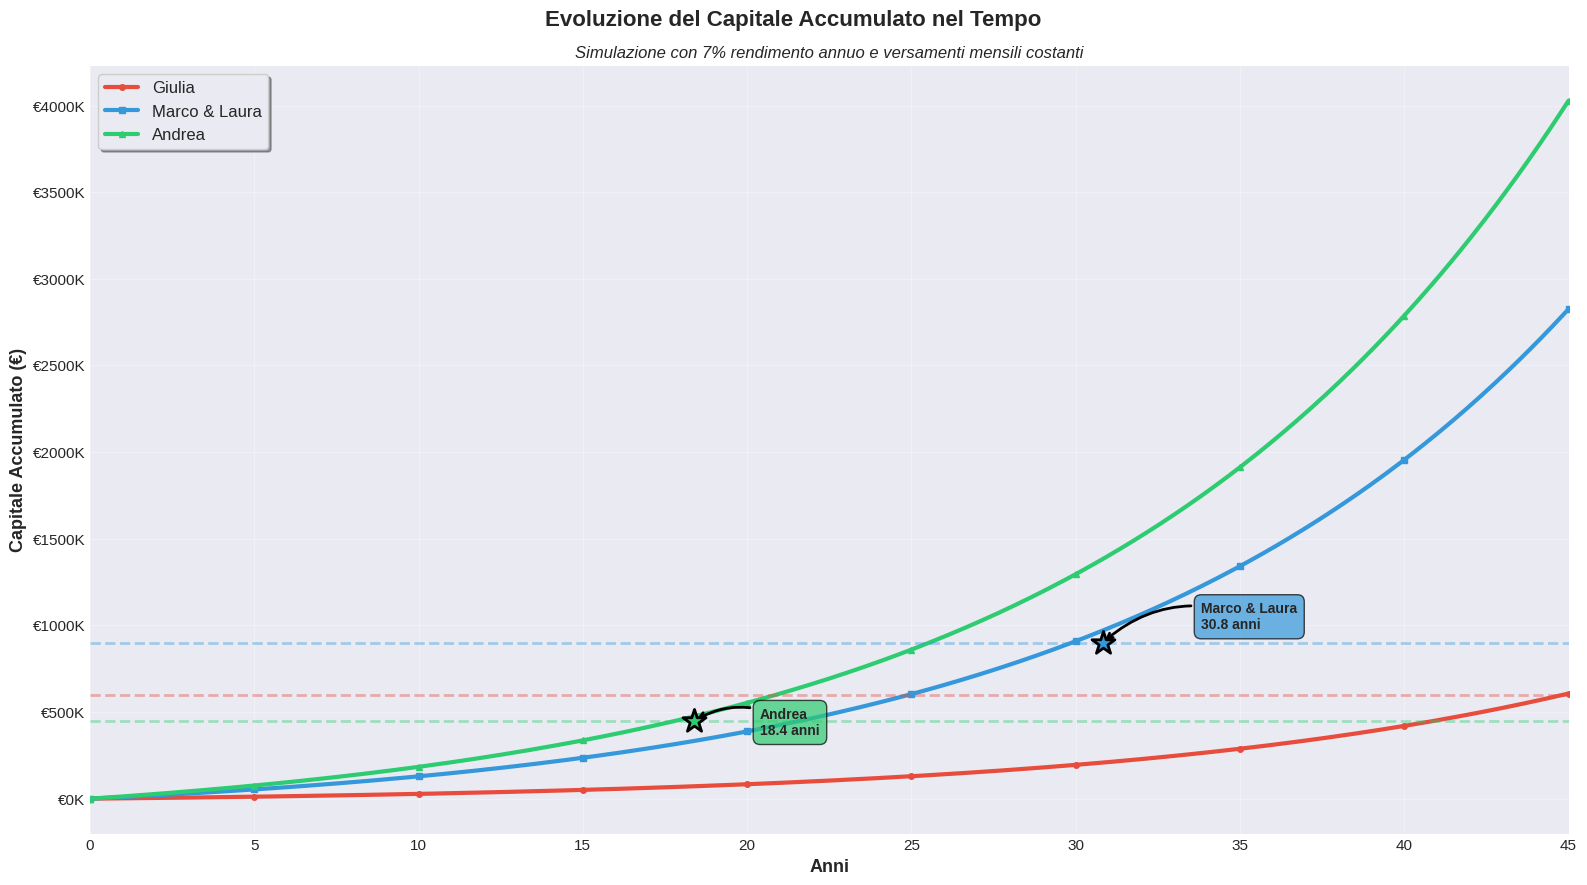

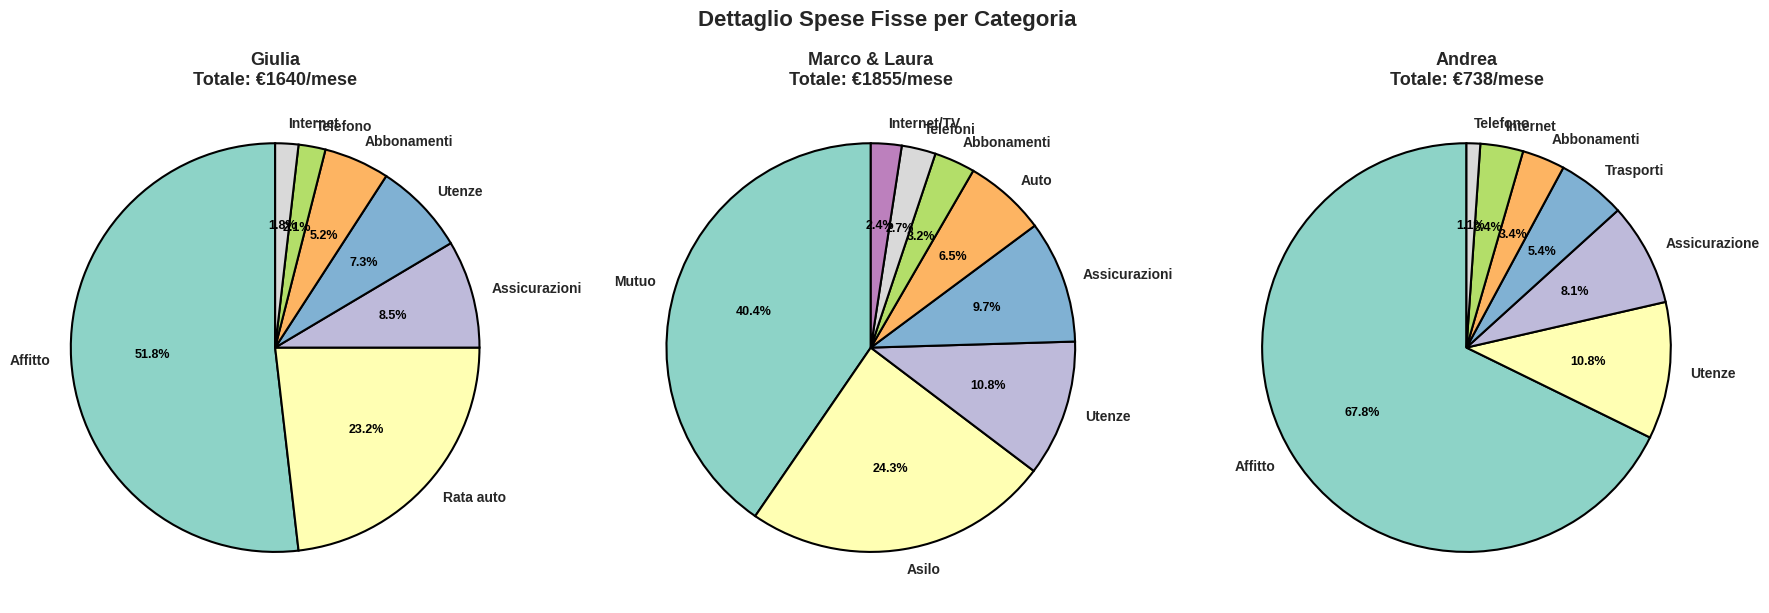

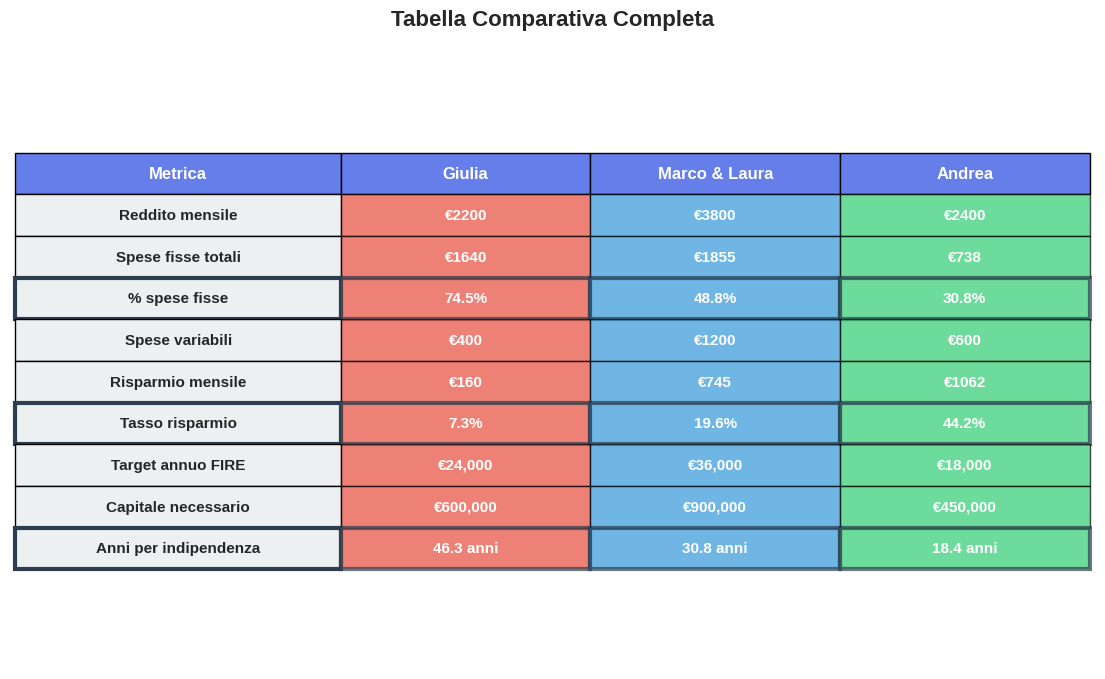

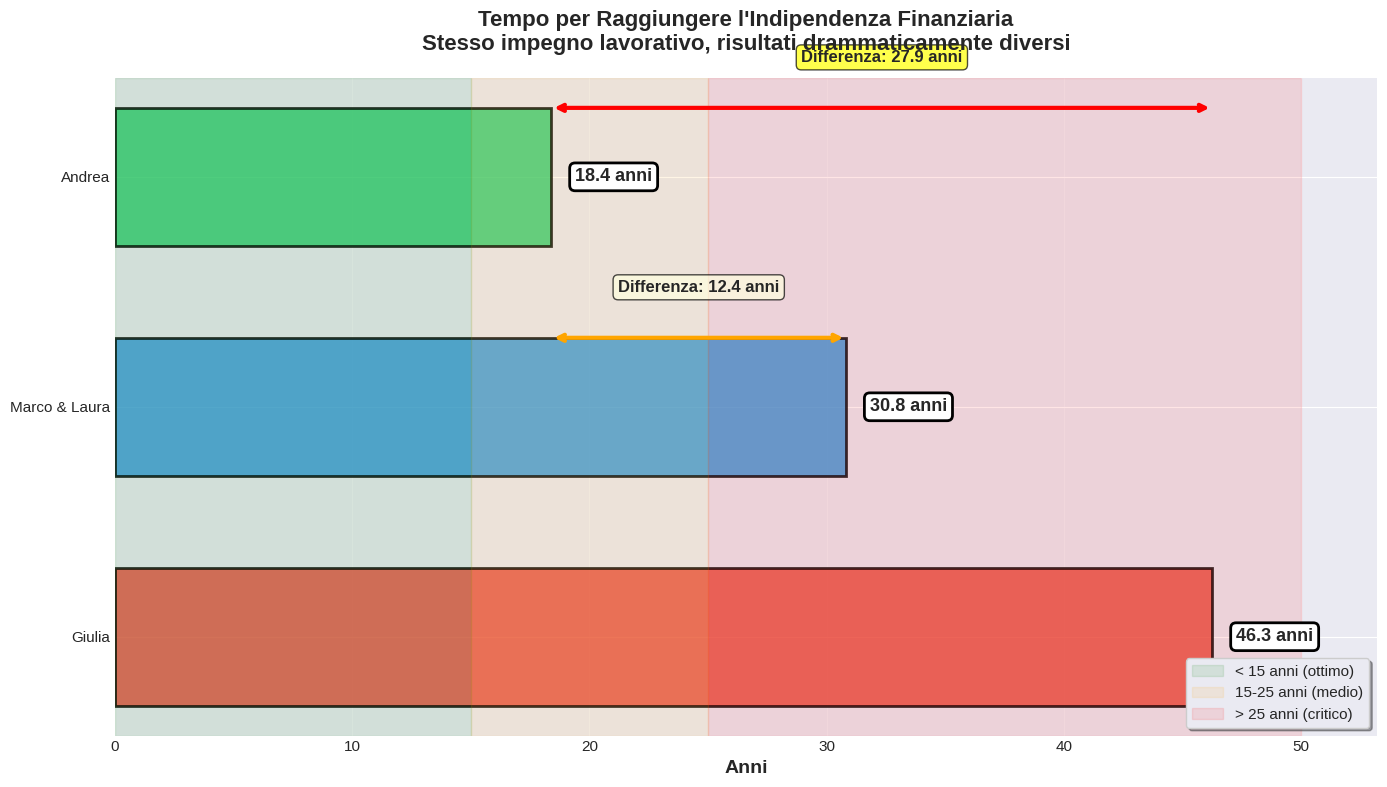


 ANALISI COMPARATIVA: GIULIA vs MARCO & LAURA vs ANDREA

GIULIA (Milano, spese alte)              MARCO & LAURA (famiglia)                 ANDREA (frugale ottimizzato)            
------------------------------------------------------------------------------------------------------------------------
Reddito: €2200                               Reddito: €3800                               Reddito: €2400                              
Spese fisse: €1640 (74.5%)                    Spese fisse: €1855 (48.8%)                  Spese fisse: €738 (30.8%)                   
Risparmio: €160/mese                         Risparmio: €745/mese                        Risparmio: €1062/mese                      
Tasso risparmio: 7.3%                         Tasso risparmio: 19.6%                       Tasso risparmio: 44.2%                       
------------------------------------------------------------------------------------------------------------------------
Anni per indipendenza: 46.3          

In [1]:
# ========================================
# ANALISI GRAFICA: 3 CASI STUDIO SPESE FISSE
# Investitore Comune - Confronto Giulia, Marco&Laura, Andrea
# ========================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Impostazioni grafiche
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# ========================================
# DATI DEI 3 CASI STUDIO
# ========================================

# CASO 1: Giulia - Single con affitto alto
giulia = {
    'nome': 'Giulia\n(32 anni, Milano)',
    'reddito': 2200,
    'spese_fisse': {
        'Affitto': 850,
        'Rata auto': 380,
        'Assicurazioni': 140,
        'Telefono': 35,
        'Internet': 30,
        'Abbonamenti': 85,
        'Utenze': 120
    },
    'spese_variabili': 400,
    'target_annuo': 24000,  # Spese annue desiderate nell'indipendenza
    'rendimento': 0.07
}

# CASO 2: Marco e Laura - Coppia con figlio
marco_laura = {
    'nome': 'Marco & Laura\n(coppia + figlio)',
    'reddito': 3800,
    'spese_fisse': {
        'Mutuo': 750,
        'Assicurazioni': 180,
        'Auto': 120,
        'Asilo': 450,
        'Telefoni': 50,
        'Internet/TV': 45,
        'Utenze': 200,
        'Abbonamenti': 60
    },
    'spese_variabili': 1200,
    'target_annuo': 36000,
    'rendimento': 0.07
}

# CASO 3: Andrea - Single frugale ottimizzato
andrea = {
    'nome': 'Andrea\n(35 anni, Treviso)',
    'reddito': 2400,
    'spese_fisse': {
        'Affitto': 500,
        'Trasporti': 40,
        'Assicurazione': 60,
        'Telefono': 8,
        'Internet': 25,
        'Abbonamenti': 25,
        'Utenze': 80
    },
    'spese_variabili': 600,
    'target_annuo': 18000,
    'rendimento': 0.07
}

# ========================================
# FUNZIONI DI CALCOLO
# ========================================

def calcola_metriche(caso):
    """Calcola tutte le metriche finanziarie per un caso"""
    totale_fisse = sum(caso['spese_fisse'].values())
    risparmio_mensile = caso['reddito'] - totale_fisse - caso['spese_variabili']
    tasso_risparmio = (risparmio_mensile / caso['reddito']) * 100
    percentuale_fisse = (totale_fisse / caso['reddito']) * 100

    # Calcolo anni per indipendenza (regola del 4%)
    capitale_necessario = caso['target_annuo'] * 25

    # Formula FV con PAC mensile
    if risparmio_mensile > 0:
        r = caso['rendimento']
        pmt = risparmio_mensile * 12
        fv = capitale_necessario

        if r > 0:
            anni = np.log((fv * r / pmt) + 1) / np.log(1 + r)
        else:
            anni = fv / pmt
    else:
        anni = np.inf

    return {
        'totale_fisse': totale_fisse,
        'risparmio_mensile': risparmio_mensile,
        'tasso_risparmio': tasso_risparmio,
        'percentuale_fisse': percentuale_fisse,
        'capitale_necessario': capitale_necessario,
        'anni_indipendenza': anni
    }

def simula_accumulo(risparmio_mensile, anni_max, rendimento):
    """Simula l'accumulo di capitale nel tempo"""
    mesi = np.arange(0, anni_max * 12 + 1)
    capitale = np.zeros(len(mesi))

    for i in range(1, len(mesi)):
        capitale[i] = capitale[i-1] * (1 + rendimento/12) + risparmio_mensile

    return mesi / 12, capitale  # Ritorna anni e capitale

# Calcola metriche per tutti i casi
giulia_metriche = calcola_metriche(giulia)
marco_laura_metriche = calcola_metriche(marco_laura)
andrea_metriche = calcola_metriche(andrea)

# ========================================
# GRAFICO 1: BREAKDOWN REDDITO E SPESE
# ========================================

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Confronto Breakdown Finanziario Mensile', fontsize=16, fontweight='bold', y=1.02)

casi = [
    (giulia, giulia_metriche, 'Giulia'),
    (marco_laura, marco_laura_metriche, 'Marco & Laura'),
    (andrea, andrea_metriche, 'Andrea')
]

colors_breakdown = ['#e74c3c', '#3498db', '#2ecc71']

for idx, (caso, metriche, nome) in enumerate(casi):
    ax = axes[idx]

    # Dati per stacked bar
    spese_fisse = metriche['totale_fisse']
    spese_var = caso['spese_variabili']
    risparmio = metriche['risparmio_mensile']

    # Colori basati sulla zona
    if metriche['percentuale_fisse'] < 35:
        color_fisse = '#2ecc71'  # verde
    elif metriche['percentuale_fisse'] < 50:
        color_fisse = '#f39c12'  # arancione
    else:
        color_fisse = '#e74c3c'  # rosso

    # Stacked bar
    bars = ax.bar(['Reddito'], [spese_fisse], color=color_fisse, label='Spese Fisse', edgecolor='black', linewidth=1.5)
    bars = ax.bar(['Reddito'], [spese_var], bottom=[spese_fisse], color='#95a5a6', label='Spese Variabili', edgecolor='black', linewidth=1.5)
    bars = ax.bar(['Reddito'], [risparmio], bottom=[spese_fisse + spese_var], color='#27ae60', label='Risparmio', edgecolor='black', linewidth=1.5)

    # Linea reddito totale
    ax.axhline(y=caso['reddito'], color='black', linestyle='--', linewidth=2, label='Reddito Totale')

    # Annotazioni
    ax.text(0, spese_fisse/2, f"€{spese_fisse:.0f}\n({metriche['percentuale_fisse']:.1f}%)",
            ha='center', va='center', fontweight='bold', fontsize=11, color='white')
    ax.text(0, spese_fisse + spese_var/2, f"€{spese_var:.0f}",
            ha='center', va='center', fontweight='bold', fontsize=11)
    ax.text(0, spese_fisse + spese_var + risparmio/2, f"€{risparmio:.0f}\n({metriche['tasso_risparmio']:.1f}%)",
            ha='center', va='center', fontweight='bold', fontsize=11, color='white')

    ax.set_ylabel('Euro (€)', fontweight='bold')
    ax.set_title(f"{caso['nome']}\nReddito: €{caso['reddito']}", fontweight='bold', fontsize=13)
    ax.set_ylim(0, caso['reddito'] * 1.1)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('confronto_breakdown_spese.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# GRAFICO 2: METRICHE CHIAVE A CONFRONTO
# ========================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Metriche Finanziarie a Confronto', fontsize=16, fontweight='bold', y=0.995)

nomi = ['Giulia', 'Marco & Laura', 'Andrea']
colors = ['#e74c3c', '#3498db', '#2ecc71']

# Subplot 1: Percentuale Spese Fisse su Reddito
ax1 = axes[0, 0]
perc_fisse = [giulia_metriche['percentuale_fisse'],
              marco_laura_metriche['percentuale_fisse'],
              andrea_metriche['percentuale_fisse']]

bars = ax1.bar(nomi, perc_fisse, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Zone colorate
ax1.axhspan(0, 35, alpha=0.1, color='green', label='Zona Verde (<35%)')
ax1.axhspan(35, 50, alpha=0.1, color='orange', label='Zona Arancione (35-50%)')
ax1.axhspan(50, 100, alpha=0.1, color='red', label='Zona Rossa (>50%)')

for i, (bar, val) in enumerate(zip(bars, perc_fisse)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{val:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

ax1.set_ylabel('Percentuale (%)', fontweight='bold')
ax1.set_title('% Spese Fisse su Reddito', fontweight='bold', fontsize=13)
ax1.set_ylim(0, 80)
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(axis='y', alpha=0.3)

# Subplot 2: Tasso di Risparmio
ax2 = axes[0, 1]
tassi_risparmio = [giulia_metriche['tasso_risparmio'],
                   marco_laura_metriche['tasso_risparmio'],
                   andrea_metriche['tasso_risparmio']]

bars = ax2.bar(nomi, tassi_risparmio, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

for i, (bar, val) in enumerate(zip(bars, tassi_risparmio)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

ax2.set_ylabel('Percentuale (%)', fontweight='bold')
ax2.set_title('Tasso di Risparmio', fontweight='bold', fontsize=13)
ax2.axhline(y=20, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Target 20%')
ax2.set_ylim(0, max(tassi_risparmio) * 1.2)
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# Subplot 3: Risparmio Mensile in Euro
ax3 = axes[1, 0]
risparmi_mensili = [giulia_metriche['risparmio_mensile'],
                    marco_laura_metriche['risparmio_mensile'],
                    andrea_metriche['risparmio_mensile']]

bars = ax3.bar(nomi, risparmi_mensili, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

for i, (bar, val) in enumerate(zip(bars, risparmi_mensili)):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             f'€{val:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

ax3.set_ylabel('Euro (€)', fontweight='bold')
ax3.set_title('Risparmio Mensile', fontweight='bold', fontsize=13)
ax3.set_ylim(0, max(risparmi_mensili) * 1.2)
ax3.grid(axis='y', alpha=0.3)

# Subplot 4: Anni per Indipendenza Finanziaria
ax4 = axes[1, 1]
anni_indip = [giulia_metriche['anni_indipendenza'],
              marco_laura_metriche['anni_indipendenza'],
              andrea_metriche['anni_indipendenza']]

bars = ax4.bar(nomi, anni_indip, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

for i, (bar, val) in enumerate(zip(bars, anni_indip)):
    if val < 100:
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{val:.1f}\nanni', ha='center', va='bottom', fontweight='bold', fontsize=11)
    else:
        ax4.text(bar.get_x() + bar.get_width()/2, 50,
                 '∞', ha='center', va='center', fontweight='bold', fontsize=24)

ax4.set_ylabel('Anni', fontweight='bold')
ax4.set_title('Anni per Indipendenza Finanziaria', fontweight='bold', fontsize=13)
ax4.axhline(y=15, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Target 15 anni')
ax4.axhline(y=25, color='orange', linestyle='--', linewidth=2, alpha=0.5, label='Limite 25 anni')
ax4.set_ylim(0, min(max(anni_indip) * 1.1, 50))
ax4.legend(fontsize=9)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('confronto_metriche_chiave.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# GRAFICO 3: EVOLUZIONE CAPITALE NEL TEMPO
# ========================================

fig, ax = plt.subplots(figsize=(16, 9))
fig.suptitle('Evoluzione del Capitale Accumulato nel Tempo', fontsize=16, fontweight='bold')

anni_max = 45

# Simulazione per ogni caso
anni_g, capitale_g = simula_accumulo(giulia_metriche['risparmio_mensile'], anni_max, giulia['rendimento'])
anni_ml, capitale_ml = simula_accumulo(marco_laura_metriche['risparmio_mensile'], anni_max, marco_laura['rendimento'])
anni_a, capitale_a = simula_accumulo(andrea_metriche['risparmio_mensile'], anni_max, andrea['rendimento'])

# Plot linee accumulo
ax.plot(anni_g, capitale_g, linewidth=3, label='Giulia', color='#e74c3c', marker='o', markersize=4, markevery=60)
ax.plot(anni_ml, capitale_ml, linewidth=3, label='Marco & Laura', color='#3498db', marker='s', markersize=4, markevery=60)
ax.plot(anni_a, capitale_a, linewidth=3, label='Andrea', color='#2ecc71', marker='^', markersize=4, markevery=60)

# Linee target capitale necessario
ax.axhline(y=giulia_metriche['capitale_necessario'], color='#e74c3c', linestyle='--', alpha=0.4, linewidth=2)
ax.axhline(y=marco_laura_metriche['capitale_necessario'], color='#3498db', linestyle='--', alpha=0.4, linewidth=2)
ax.axhline(y=andrea_metriche['capitale_necessario'], color='#2ecc71', linestyle='--', alpha=0.4, linewidth=2)

# Marker punti di raggiungimento target
if giulia_metriche['anni_indipendenza'] < anni_max:
    ax.scatter(giulia_metriche['anni_indipendenza'], giulia_metriche['capitale_necessario'],
               s=300, color='#e74c3c', marker='*', edgecolor='black', linewidth=2, zorder=5)
    ax.annotate(f"Giulia\n{giulia_metriche['anni_indipendenza']:.1f} anni",
                xy=(giulia_metriche['anni_indipendenza'], giulia_metriche['capitale_necessario']),
                xytext=(giulia_metriche['anni_indipendenza']+3, giulia_metriche['capitale_necessario']+50000),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='#e74c3c', alpha=0.7, edgecolor='black'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', lw=2))

if marco_laura_metriche['anni_indipendenza'] < anni_max:
    ax.scatter(marco_laura_metriche['anni_indipendenza'], marco_laura_metriche['capitale_necessario'],
               s=300, color='#3498db', marker='*', edgecolor='black', linewidth=2, zorder=5)
    ax.annotate(f"Marco & Laura\n{marco_laura_metriche['anni_indipendenza']:.1f} anni",
                xy=(marco_laura_metriche['anni_indipendenza'], marco_laura_metriche['capitale_necessario']),
                xytext=(marco_laura_metriche['anni_indipendenza']+3, marco_laura_metriche['capitale_necessario']+80000),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='#3498db', alpha=0.7, edgecolor='black'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', lw=2))

if andrea_metriche['anni_indipendenza'] < anni_max:
    ax.scatter(andrea_metriche['anni_indipendenza'], andrea_metriche['capitale_necessario'],
               s=300, color='#2ecc71', marker='*', edgecolor='black', linewidth=2, zorder=5)
    ax.annotate(f"Andrea\n{andrea_metriche['anni_indipendenza']:.1f} anni",
                xy=(andrea_metriche['anni_indipendenza'], andrea_metriche['capitale_necessario']),
                xytext=(andrea_metriche['anni_indipendenza']+2, andrea_metriche['capitale_necessario']-80000),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='#2ecc71', alpha=0.7, edgecolor='black'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', lw=2))

ax.set_xlabel('Anni', fontweight='bold', fontsize=13)
ax.set_ylabel('Capitale Accumulato (€)', fontweight='bold', fontsize=13)
ax.set_title('Simulazione con 7% rendimento annuo e versamenti mensili costanti', fontsize=12, style='italic')
ax.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, anni_max)

# Formattazione asse Y in migliaia
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}K'))

plt.tight_layout()
plt.savefig('evoluzione_capitale_tempo.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# GRAFICO 4: BREAKDOWN SPESE PER CATEGORIA
# ========================================

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Dettaglio Spese Fisse per Categoria', fontsize=16, fontweight='bold', y=1.02)

casi_dettaglio = [
    (giulia, 'Giulia'),
    (marco_laura, 'Marco & Laura'),
    (andrea, 'Andrea')
]

# Palette colori per categorie
colors_cat = plt.cm.Set3(np.linspace(0, 1, 10))

for idx, (caso, nome) in enumerate(casi_dettaglio):
    ax = axes[idx]

    categorie = list(caso['spese_fisse'].keys())
    valori = list(caso['spese_fisse'].values())

    # Ordina per valore decrescente
    sorted_idx = np.argsort(valori)[::-1]
    categorie = [categorie[i] for i in sorted_idx]
    valori = [valori[i] for i in sorted_idx]

    # Pie chart
    wedges, texts, autotexts = ax.pie(valori, labels=categorie, autopct='%1.1f%%',
                                        startangle=90, colors=colors_cat,
                                        wedgeprops=dict(edgecolor='black', linewidth=1.5),
                                        textprops={'fontsize': 10, 'weight': 'bold'})

    # Migliorare leggibilità percentuali
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(9)
        autotext.set_weight('bold')

    totale = sum(valori)
    ax.set_title(f"{nome}\nTotale: €{totale:.0f}/mese", fontweight='bold', fontsize=13)

plt.tight_layout()
plt.savefig('breakdown_categorie_spese.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# GRAFICO 5: TABELLA COMPARATIVA
# ========================================

fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('tight')
ax.axis('off')

# Dati tabella
table_data = [
    ['Metrica', 'Giulia', 'Marco & Laura', 'Andrea'],
    ['Reddito mensile', f"€{giulia['reddito']}", f"€{marco_laura['reddito']}", f"€{andrea['reddito']}"],
    ['Spese fisse totali', f"€{giulia_metriche['totale_fisse']:.0f}",
     f"€{marco_laura_metriche['totale_fisse']:.0f}", f"€{andrea_metriche['totale_fisse']:.0f}"],
    ['% spese fisse', f"{giulia_metriche['percentuale_fisse']:.1f}%",
     f"{marco_laura_metriche['percentuale_fisse']:.1f}%", f"{andrea_metriche['percentuale_fisse']:.1f}%"],
    ['Spese variabili', f"€{giulia['spese_variabili']}",
     f"€{marco_laura['spese_variabili']}", f"€{andrea['spese_variabili']}"],
    ['Risparmio mensile', f"€{giulia_metriche['risparmio_mensile']:.0f}",
     f"€{marco_laura_metriche['risparmio_mensile']:.0f}", f"€{andrea_metriche['risparmio_mensile']:.0f}"],
    ['Tasso risparmio', f"{giulia_metriche['tasso_risparmio']:.1f}%",
     f"{marco_laura_metriche['tasso_risparmio']:.1f}%", f"{andrea_metriche['tasso_risparmio']:.1f}%"],
    ['Target annuo FIRE', f"€{giulia['target_annuo']:,}",
     f"€{marco_laura['target_annuo']:,}", f"€{andrea['target_annuo']:,}"],
    ['Capitale necessario', f"€{giulia_metriche['capitale_necessario']:,.0f}",
     f"€{marco_laura_metriche['capitale_necessario']:,.0f}", f"€{andrea_metriche['capitale_necessario']:,.0f}"],
    ['Anni per indipendenza', f"{giulia_metriche['anni_indipendenza']:.1f} anni",
     f"{marco_laura_metriche['anni_indipendenza']:.1f} anni", f"{andrea_metriche['anni_indipendenza']:.1f} anni"],
]

# Crea tabella
table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.3, 0.23, 0.23, 0.23])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Formattazione header
for i in range(4):
    cell = table[(0, i)]
    cell.set_facecolor('#667eea')
    cell.set_text_props(weight='bold', color='white', fontsize=12)

# Formattazione colonne con colori
colors_cols = ['#e74c3c', '#3498db', '#2ecc71']
for row in range(1, len(table_data)):
    # Prima colonna (label)
    table[(row, 0)].set_facecolor('#ecf0f1')
    table[(row, 0)].set_text_props(weight='bold')

    # Colonne dati
    for col in range(1, 4):
        table[(row, col)].set_facecolor(colors_cols[col-1])
        table[(row, col)].set_text_props(color='white', weight='bold')
        table[(row, col)].set_alpha(0.7)

# Evidenzia righe chiave
for row in [3, 6, 9]:  # % spese fisse, tasso risparmio, anni indipendenza
    for col in range(4):
        table[(row, col)].set_linewidth(3)
        table[(row, col)].set_edgecolor('#2c3e50')

ax.set_title('Tabella Comparativa Completa', fontsize=16, fontweight='bold', pad=20)

plt.savefig('tabella_comparativa.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# GRAFICO 6: DIFFERENZA TEMPORALE
# ========================================

fig, ax = plt.subplots(figsize=(14, 8))

anni_labels = ['Giulia', 'Marco & Laura', 'Andrea']
anni_vals = [giulia_metriche['anni_indipendenza'],
             marco_laura_metriche['anni_indipendenza'],
             andrea_metriche['anni_indipendenza']]

# Barre orizzontali
bars = ax.barh(anni_labels, anni_vals, color=['#e74c3c', '#3498db', '#2ecc71'],
               edgecolor='black', linewidth=2, alpha=0.8, height=0.6)

# Annotazioni con differenze
differenza_giulia_andrea = giulia_metriche['anni_indipendenza'] - andrea_metriche['anni_indipendenza']
differenza_ml_andrea = marco_laura_metriche['anni_indipendenza'] - andrea_metriche['anni_indipendenza']

# Frecce differenze
ax.annotate('', xy=(andrea_metriche['anni_indipendenza'], 2.3),
            xytext=(giulia_metriche['anni_indipendenza'], 2.3),
            arrowprops=dict(arrowstyle='<->', lw=3, color='red'))
ax.text((giulia_metriche['anni_indipendenza'] + andrea_metriche['anni_indipendenza'])/2, 2.5,
        f"Differenza: {differenza_giulia_andrea:.1f} anni",
        ha='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax.annotate('', xy=(andrea_metriche['anni_indipendenza'], 1.3),
            xytext=(marco_laura_metriche['anni_indipendenza'], 1.3),
            arrowprops=dict(arrowstyle='<->', lw=3, color='orange'))
ax.text((marco_laura_metriche['anni_indipendenza'] + andrea_metriche['anni_indipendenza'])/2, 1.5,
        f"Differenza: {differenza_ml_andrea:.1f} anni",
        ha='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

# Valori finali
for i, (bar, val) in enumerate(zip(bars, anni_vals)):
    ax.text(val + 1, bar.get_y() + bar.get_height()/2,
            f'{val:.1f} anni',
            va='center', fontweight='bold', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', linewidth=2))

ax.set_xlabel('Anni', fontweight='bold', fontsize=14)
ax.set_title('Tempo per Raggiungere l\'Indipendenza Finanziaria\nStesso impegno lavorativo, risultati drammaticamente diversi',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlim(0, max(anni_vals) * 1.15)
ax.grid(axis='x', alpha=0.3)

# Zone temporali
ax.axvspan(0, 15, alpha=0.1, color='green', label='< 15 anni (ottimo)')
ax.axvspan(15, 25, alpha=0.1, color='orange', label='15-25 anni (medio)')
ax.axvspan(25, 50, alpha=0.1, color='red', label='> 25 anni (critico)')
ax.legend(loc='lower right', fontsize=11, frameon=True, shadow=True)

plt.tight_layout()
plt.savefig('confronto_tempo_indipendenza.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# STAMPA SUMMARY TESTUALE
# ========================================

print("\n" + "="*80)
print(" ANALISI COMPARATIVA: GIULIA vs MARCO & LAURA vs ANDREA")
print("="*80)
print(f"\n{'GIULIA (Milano, spese alte)':<40} {'MARCO & LAURA (famiglia)':<40} {'ANDREA (frugale ottimizzato)':<40}")
print("-"*120)
print(f"Reddito: €{giulia['reddito']:<34} Reddito: €{marco_laura['reddito']:<34} Reddito: €{andrea['reddito']:<34}")
print(f"Spese fisse: €{giulia_metriche['totale_fisse']:.0f} ({giulia_metriche['percentuale_fisse']:.1f}%){'':<19} Spese fisse: €{marco_laura_metriche['totale_fisse']:.0f} ({marco_laura_metriche['percentuale_fisse']:.1f}%){'':<17} Spese fisse: €{andrea_metriche['totale_fisse']:.0f} ({andrea_metriche['percentuale_fisse']:.1f}%){'':<19}")
print(f"Risparmio: €{giulia_metriche['risparmio_mensile']:.0f}/mese{'':<24} Risparmio: €{marco_laura_metriche['risparmio_mensile']:.0f}/mese{'':<23} Risparmio: €{andrea_metriche['risparmio_mensile']:.0f}/mese{'':<22}")
print(f"Tasso risparmio: {giulia_metriche['tasso_risparmio']:.1f}%{'':<24} Tasso risparmio: {marco_laura_metriche['tasso_risparmio']:.1f}%{'':<22} Tasso risparmio: {andrea_metriche['tasso_risparmio']:.1f}%{'':<23}")
print("-"*120)
print(f"Anni per indipendenza: {giulia_metriche['anni_indipendenza']:.1f}{'':<17} Anni per indipendenza: {marco_laura_metriche['anni_indipendenza']:.1f}{'':<15} Anni per indipendenza: {andrea_metriche['anni_indipendenza']:.1f}{'':<16}")
print("="*120)
print(f"\n🎯 INSIGHT CHIAVE:")
print(f"   Andrea raggiunge l'indipendenza {differenza_giulia_andrea:.1f} anni PRIMA di Giulia")
print(f"   Stesso stipendio (±€200), ma scelte di vita radicalmente diverse")
print(f"   Differenza: ottimizzazione spese fisse dal {giulia_metriche['percentuale_fisse']:.1f}% al {andrea_metriche['percentuale_fisse']:.1f}%")
print("="*120 + "\n")

print("✅ Grafici salvati con successo!")
print("   - confronto_breakdown_spese.png")
print("   - confronto_metriche_chiave.png")
print("   - evoluzione_capitale_tempo.png")
print("   - breakdown_categorie_spese.png")
print("   - tabella_comparativa.png")
print("   - confronto_tempo_indipendenza.png")